In [6]:
# 1 import libraries and load the dataset
import pandas as pd

In [20]:
df = pd.read_csv("book.csv")
df.head()

,CompletedLastBook,UnreadBooksInShelf,OngoingTests,Genre,Status,Read
0,no,0,no,SWE,Bought,yes
1,no,2,yes,Fiction,Rented,no
2,no,5,no,Drama,Bought,no
3,no,1,yes,SWE,Rented,yes
4,no,2,no,SciFi,Lent,yes


In [21]:
# 2Work with X (Predictor Vars)
X_features = list(df.columns)
X_features.remove("Read")
X_features

['CompletedLastBook', 'UnreadBooksInShelf', 'OngoingTests', 'Genre', 'Status']

In [22]:
# 3. Encode all the categorical vars in the dataset
# pandas.get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)[source]
encoded_df = pd.get_dummies(df[X_features])
encoded_df.head()

,UnreadBooksInShelf,CompletedLastBook_no,CompletedLastBook_yes,OngoingTests_no,OngoingTests_yes,Genre_Comedy,Genre_Drama,Genre_Fiction,Genre_SWE,Genre_SciFi,Genre_Thriller,Status_Bought,Status_Lent,Status_Rented,Status_bought
0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0
1,2,1,0,0,1,0,0,1,0,0,0,0,0,1,0
2,5,1,0,1,0,0,1,0,0,0,0,1,0,0,0
3,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0
4,2,1,0,1,0,0,0,0,0,1,0,0,1,0,0


In [15]:
# 4. Set X and Y
X = encoded_df
Y = df.Output
X, Y

(   currentCars  familyMembers  publicTransport_bad  publicTransport_good  \
 0            1              3                    0                     1   
 1            1              3                    1                     0   
 2            0              2                    0                     1   
 3            0              5                    0                     0   
 4            0              4                    1                     0   
 5            1              2                    1                     0   
 6            0              3                    0                     1   
 7            2              6                    1                     0   
 8            2              6                    0                     1   
 9            3              3                    1                     0   
 
    publicTransport_good   outStationTravelFrequency_high  \
 0                      0                               1   
 1                      0    

In [23]:
# 5. Split the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=20)

In [24]:
# 6. Build the Decision Tree
from sklearn.tree import DecisionTreeClassifier
clf_tree = DecisionTreeClassifier(criterion = 'gini', max_depth=3)

In [25]:
clf_tree.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3)

In [26]:
# 7. Accuracy Score
clf_tree.score(X_test, Y_test)

0.3333333333333333

In [29]:
import matplotlib.pyplot as plt
from sklearn import tree

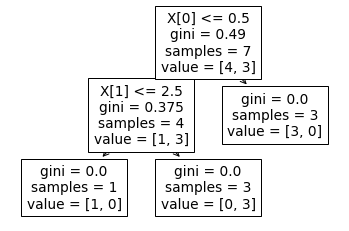

In [31]:
tree.plot_tree(clf_tree);